In [101]:
import pandas as pd
import numpy as np

train_x = pd.read_csv("mnist_Xtrain.csv", header = None).to_numpy()
train_y = pd.read_csv("mnist_Ytrain.csv", header = None).to_numpy()
test_x = pd.read_csv("mnist_Xtest.csv", header = None).to_numpy()
test_y = pd.read_csv("mnist_Ytest.csv", header = None).to_numpy()


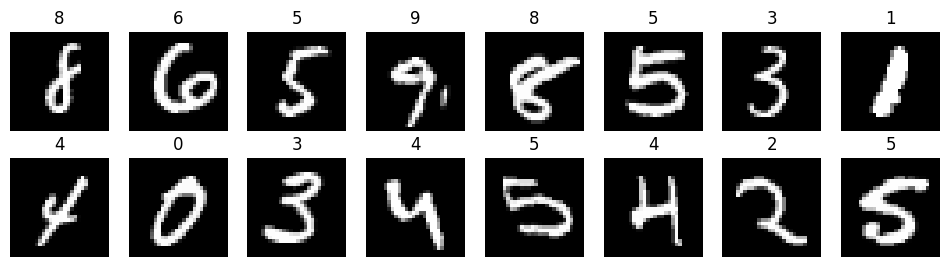

In [3]:
import matplotlib.pyplot as plt
    
figure = plt.figure(figsize=(12,3))
col , rows = 8, 2
for i in range(1, col*rows + 1):
    sample_idx = np.random.choice(len(train_y), 1)[0]
    img, label = train_x[sample_idx].reshape((28,28)), train_y.squeeze()[sample_idx]
    figure.add_subplot(rows, col, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

## METRICAS

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
def metrics_error(y, predict):
    cm = confusion_matrix(y, predict)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print(classification_report(y, predict))

## REGRESION LOGISTICA

----------Errores en el conjunto de prueba------------------


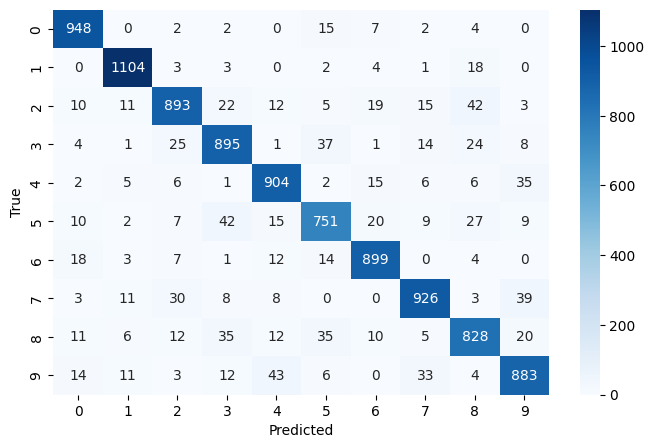

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.96      0.97      0.96      1135
           2       0.90      0.87      0.88      1032
           3       0.88      0.89      0.88      1010
           4       0.90      0.92      0.91       982
           5       0.87      0.84      0.85       892
           6       0.92      0.94      0.93       958
           7       0.92      0.90      0.91      1028
           8       0.86      0.85      0.86       974
           9       0.89      0.88      0.88      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [87]:
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import confusion_matrix, classification_report

    def pca_logistic_classification(X_train, y_train, X_test, y_test, n_components=50):
        # Escalado de los datos
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Aplicar PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)
        
        # Entrenamiento del modelo de regresión logística
        model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
        model.fit(X_train_pca, y_train.ravel()) 

        # Predicción y evaluación en el conjunto de prueba
        y_test_pred = model.predict(X_test_pca)
        print("----------Errores en el conjunto de prueba------------------")
        metrics_error(y_test, y_test_pred)

        return y_test_pred, model

    # Código para llamar a la función, asumiendo que los datos ya están cargados y preparados
    y_pred, LR = pca_logistic_classification(train_x, train_y, test_x, test_y)


## REDES NEURONALES

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(test_x)


In [18]:
hidden_layer_sizes = [10]  
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=hidden_layer_sizes, random_state=1, alpha=0.0001, max_iter=200, activation='tanh')
mlp.fit(X_train_scaled, train_y.ravel())


c:\Users\nmari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=[10], random_state=1)

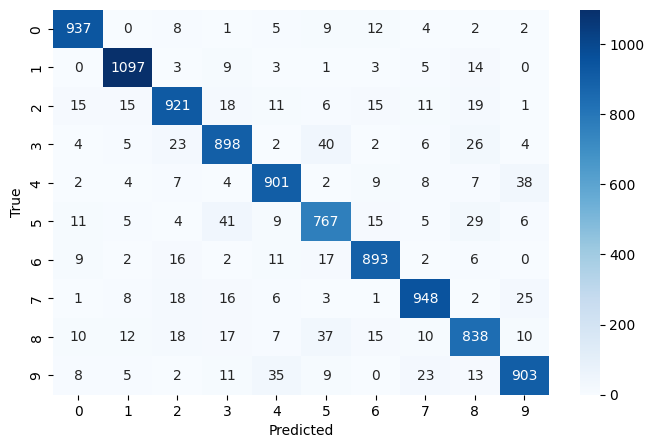

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.95      0.97      0.96      1135
           2       0.90      0.89      0.90      1032
           3       0.88      0.89      0.89      1010
           4       0.91      0.92      0.91       982
           5       0.86      0.86      0.86       892
           6       0.93      0.93      0.93       958
           7       0.93      0.92      0.92      1028
           8       0.88      0.86      0.87       974
           9       0.91      0.89      0.90      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [19]:
y_test_pred = mlp.predict(X_test_scaled)
metrics_error(test_y, y_test_probtuvo un puntaje cercano a ed)


## SVM

In [21]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# Configuración del SVM
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, train_y.ravel())


SVC()

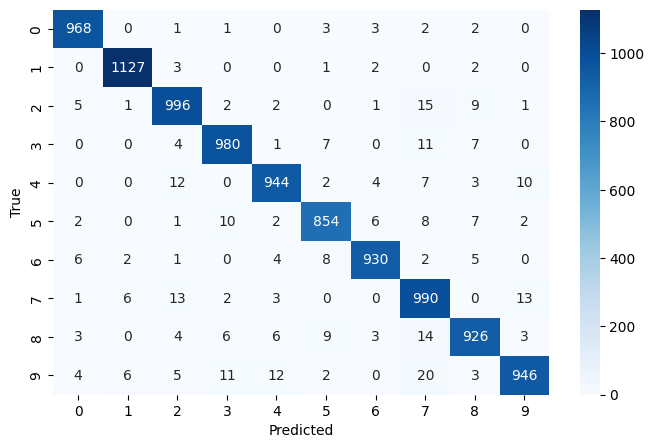

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [23]:
# Predicción sobre el conjunto de prueba
y_test_pred = svm.predict(X_test_scaled)
# Evaluación del modelo
metrics_error(test_y, y_test_pred)


## CART

In [25]:
y_train = train_y.ravel()
y_test = test_y.ravel()


In [34]:
from sklearn.tree import DecisionTreeClassifier

ctree = DecisionTreeClassifier(
    max_depth=10,           
    min_samples_split=50,  
    min_samples_leaf=30,    
    random_state=0,
    criterion='entropy'
)
ctree.fit(train_x, y_train)

# Evaluar el modelo en el conjunto de entrenamiento y de prueba
print("Accuracy on training set: {:.3f}".format(ctree.score(train_x, y_train)))
print("Accuracy on test set: {:.3f}".format(ctree.score(test_x, y_test)))


Accuracy on training set: 0.875
Accuracy on test set: 0.857


C:\Users\nmari\AppData\Local\Temp\ipykernel_8836\2347965620.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')


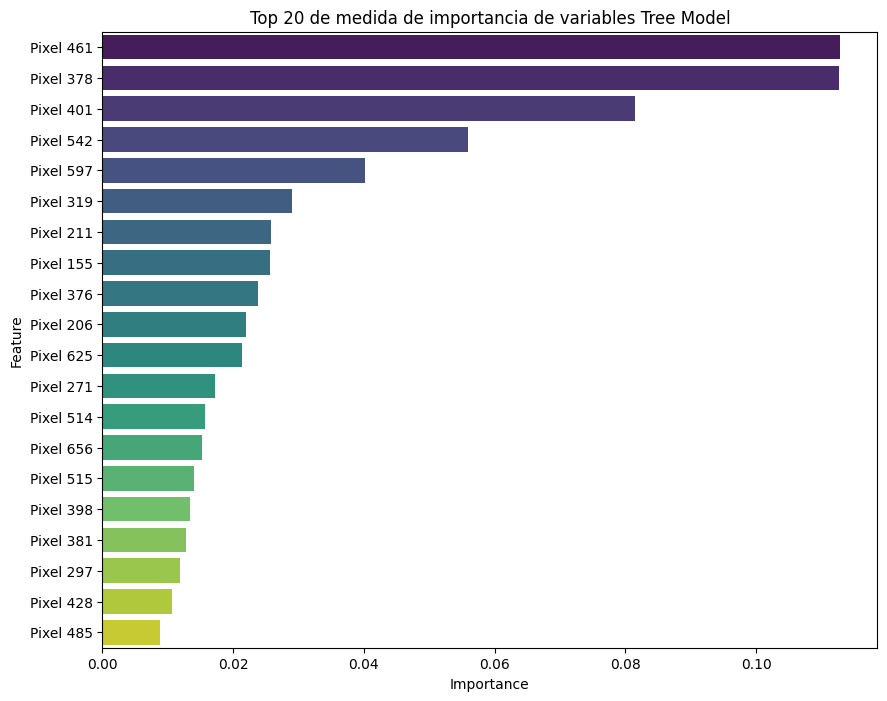

In [102]:
# Obtener las importancias de las características
feature_importances = ctree.feature_importances_

# Crear un DataFrame para las importancias de características
features = [f'Pixel {i}' for i in range(train_x.shape[1])]
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualización de las 20 características más importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 de medida de importancia de variables Tree Model')
plt.show()


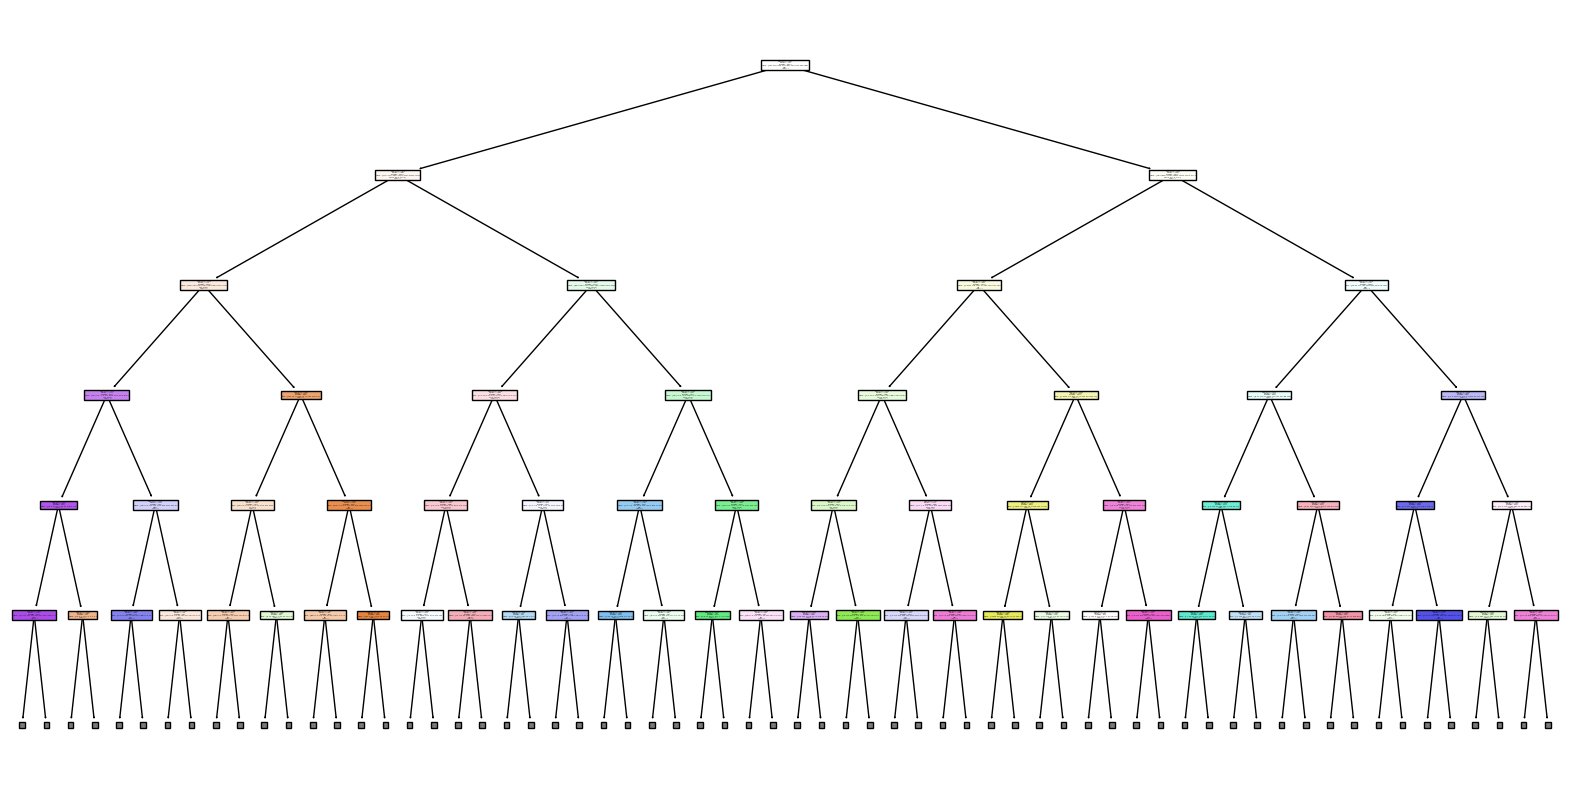

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(ctree, filled=True, max_depth=5, feature_names=[f'Pixel {i}' for i in range(train_x.shape[1])], class_names=[str(i) for i in range(10)])
plt.show()


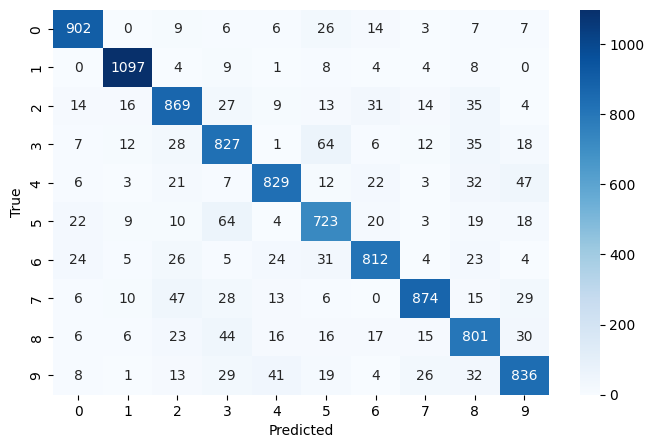

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       980
           1       0.95      0.97      0.96      1135
           2       0.83      0.84      0.83      1032
           3       0.79      0.82      0.80      1010
           4       0.88      0.84      0.86       982
           5       0.79      0.81      0.80       892
           6       0.87      0.85      0.86       958
           7       0.91      0.85      0.88      1028
           8       0.80      0.82      0.81       974
           9       0.84      0.83      0.84      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [39]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ctree.predict(test_x)
metrics_error(y_test, y_pred)

## BOOSTING

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [45]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators=200,                   # Aumentamos el número de estimadores
    algorithm="SAMME.R",
    learning_rate=0.5,
    random_state=42
)
ada_clf.fit(train_x, train_y)


c:\Users\nmari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nmari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.5, n_estimators=200, random_state=42)

Evaluación en el conjunto de entrenamiento:


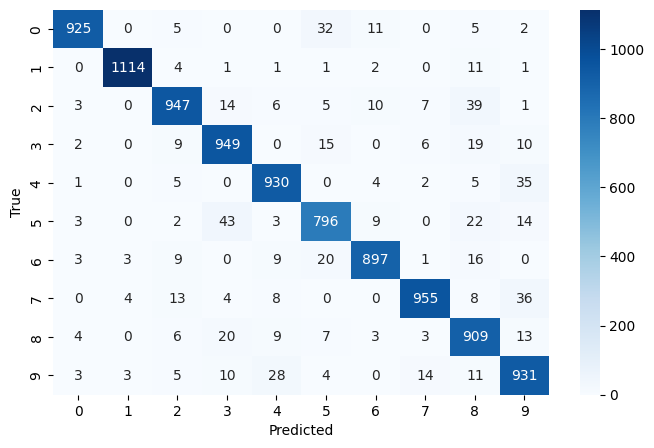

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       980
           1       0.99      0.98      0.99      1135
           2       0.94      0.92      0.93      1032
           3       0.91      0.94      0.93      1010
           4       0.94      0.95      0.94       982
           5       0.90      0.89      0.90       892
           6       0.96      0.94      0.95       958
           7       0.97      0.93      0.95      1028
           8       0.87      0.93      0.90       974
           9       0.89      0.92      0.91      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.94      0.94     10000



In [105]:
# Predicciones del modelo
y_train_pred = ada_clf.predict(train_x)
y_test_pred = ada_clf.predict(test_x)

# Usar la función metrics_error para evaluar el modelo
print("Evaluación en el conjunto de entrenamiento:")
metrics_error(test_y, y_test_pred)


C:\Users\nmari\AppData\Local\Temp\ipykernel_8836\1389615913.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')


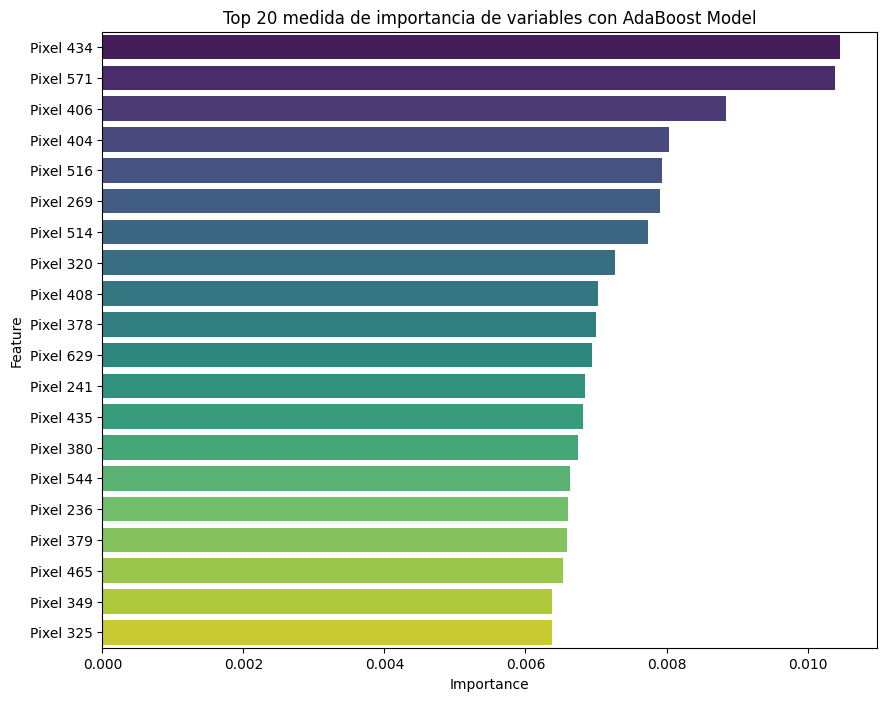

In [106]:
# Obteniendo las importancias de las características
feature_importances = ada_clf.feature_importances_

# Crear un DataFrame para visualizar las importancias
features = [f'Pixel {i}' for i in range(len(feature_importances))]
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualización de las top 20 características más importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 medida de importancia de variables con AdaBoost Model')
plt.show()

## EMSAMBLE

In [59]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [60]:
bagging_model = BaggingClassifier(n_estimators=100, n_jobs=-1, random_state=42)


In [50]:
random_forest_model = RandomForestClassifier(n_estimators=100, min_samples_split=15, n_jobs=-1, random_state=42)

c:\Users\nmari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluación de Bagging:


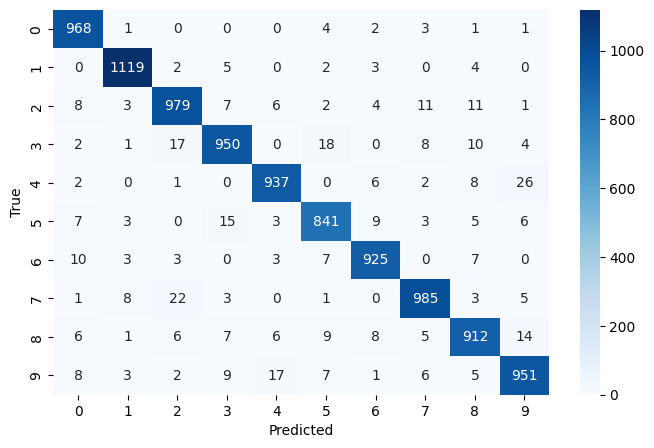

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.95      0.94      0.95      1010
           4       0.96      0.95      0.96       982
           5       0.94      0.94      0.94       892
           6       0.97      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.94      0.94      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [61]:
# Entrenar y evaluar el modelo Bagging
bagging_model.fit(train_x, train_y)
bagging_predictions = bagging_model.predict(test_x)
print("Evaluación de Bagging:")
metrics_error(test_y, bagging_predictions)


C:\Users\nmari\AppData\Local\Temp\ipykernel_8836\3247952722.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')


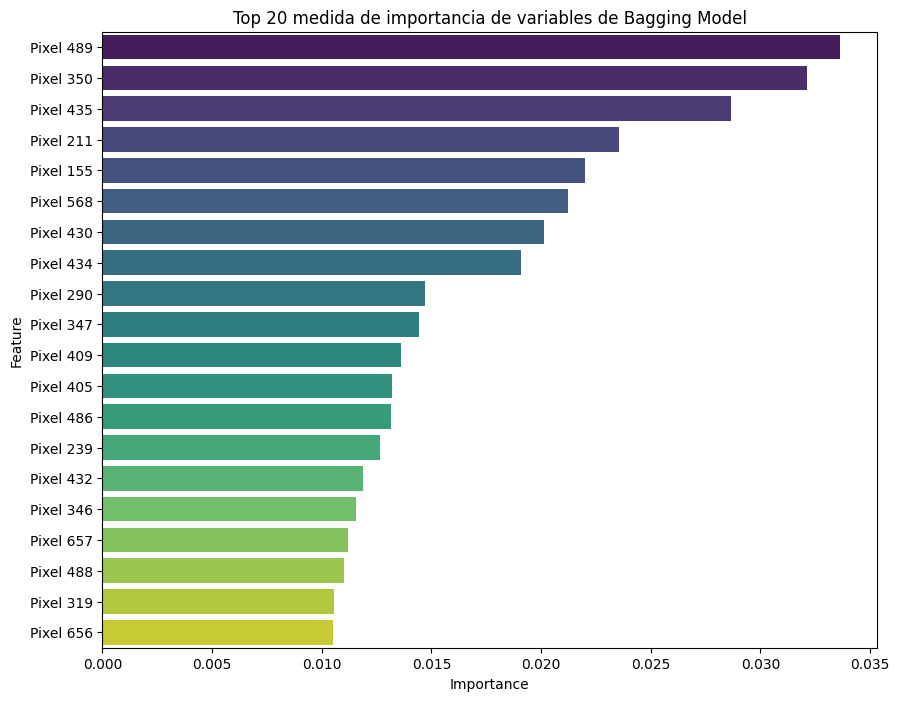

In [107]:
import numpy as np
estimators = bagging_model.estimators_
feature_importances = np.zeros(train_x.shape[1])
for estimator in estimators:
    feature_importances += estimator.feature_importances_

# Calcular el promedio de las importancias
feature_importances /= len(estimators)

# Crear una lista de nombres de características para visualización
feature_names = [f'Pixel {i}' for i in range(train_x.shape[1])]
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualización de las 20 características más importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 medida de importancia de variables de Bagging Model')
plt.show()


c:\Users\nmari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Evaluación de Random Forests:


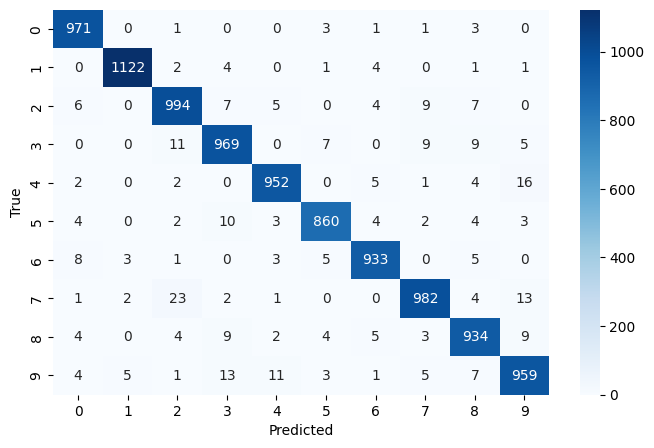

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [62]:
# Entrenar y evaluar el modelo Random Forest
random_forest_model.fit(train_x, train_y)
forest_predictions = random_forest_model.predict(test_x)
print("Evaluación de Random Forests:")
metrics_error(test_y, forest_predictions)


C:\Users\nmari\AppData\Local\Temp\ipykernel_8836\3804205557.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')


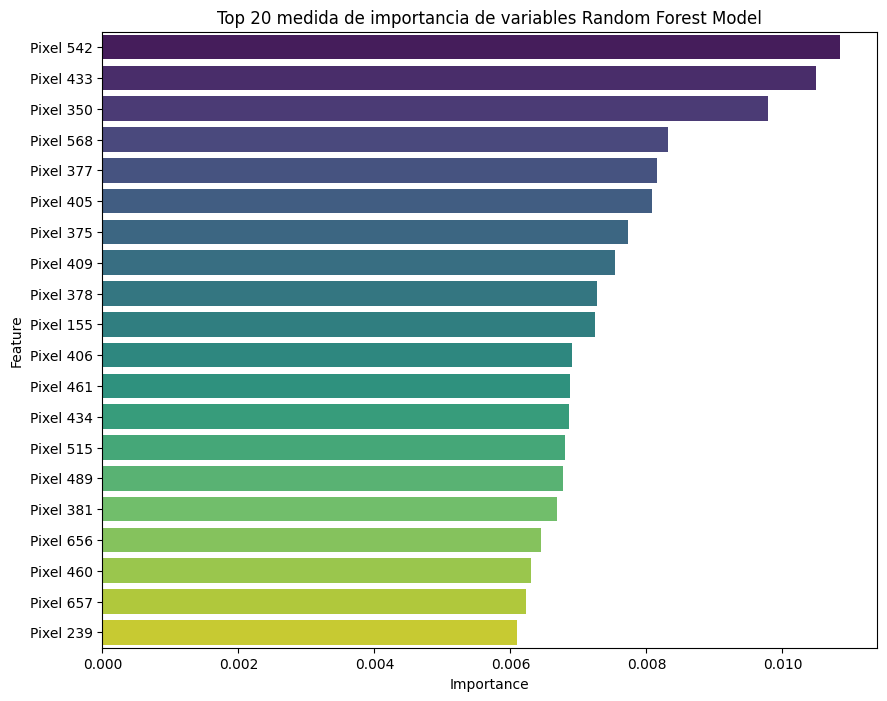

In [108]:
# Obtener las importancias de las características
feature_importances = random_forest_model.feature_importances_

import pandas as pd

# Crear un DataFrame para las importancias de características
features = [f'Pixel {i}' for i in range(len(feature_importances))]
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualización de las 20 características más importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 medida de importancia de variables Random Forest Model')
plt.show()



C:\Users\nmari\AppData\Local\Temp\ipykernel_8836\914570188.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=45, ha='right')


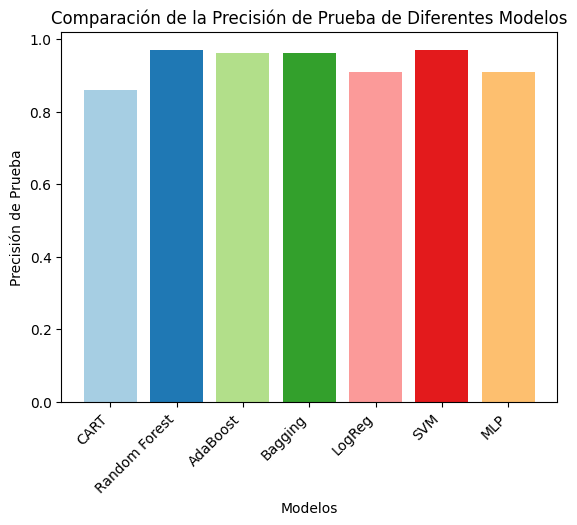

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tienes un array de precisión para cada modelo
model_names = ['CART', 'Random Forest', 'AdaBoost', 'Bagging', 'LogReg', 'SVM', 'MLP']
test_accuracy = [0.86, 0.97, 0.96, 0.96, 0.91, 0.97, 0.91]

fig, ax = plt.subplots()
bars = ax.bar(model_names, test_accuracy, color=plt.cm.Paired(np.arange(len(test_accuracy))))
ax.set_xlabel('Modelos')
ax.set_ylabel('Precisión de Prueba')
ax.set_title('Comparación de la Precisión de Prueba de Diferentes Modelos')
ax.set_xticklabels(model_names, rotation=45, ha='right')
plt.show()


In [83]:
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageDraw
import numpy as np
import joblib

In [88]:
joblib.dump(LR, 'model_log_multi.pkl')
joblib.dump(mlp, 'mlp_model.pkl')
joblib.dump(svm, 'svm_model.pkl')
joblib.dump(ctree, 'ctree_model.pkl')
joblib.dump(ada_clf, 'ada_cart.pkl')
joblib.dump(bagging_model, 'bagg_model.pkl')
joblib.dump(random_forest_model, 'rf_model.pkl')

['rf_model.pkl']

In [112]:
import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np
import joblib

class DigitRecognizer(tk.Tk):
    def __init__(self):  # Corregido aquí
        super().__init__()  # Corregido aquí
        self.title("Identificador de Dígitos")
        self.geometry("450x700")
        self.canvas = tk.Canvas(self, width=280, height=280, bg='white')
        self.canvas.pack(pady=20)
        self.canvas.bind("<B1-Motion>", self.paint)

        # Cargando todos los modelos necesarios
        self.log_multi = joblib.load('model_log_multi.pkl')
        self.svm = joblib.load('svm_model.pkl')
        self.ctree = joblib.load('ctree_model.pkl')
        self.ada_cart = joblib.load('ada_cart.pkl')
        self.bagg = joblib.load('bagg_model.pkl')
        self.bagg.set_params(n_jobs=1)
        self.rf = joblib.load('rf_model.pkl')
        self.mlp = joblib.load('mlp_model.pkl')  # Asegúrate de que este modelo esté cargado correctamente

        self.image = Image.new("L", (280, 280), "white")
        self.draw = ImageDraw.Draw(self.image)

        self.setup_buttons()
        self.label_prediction = tk.Label(self, text="Dígito predecido: 1")
        self.label_prediction.pack(pady=20)

    def setup_buttons(self):
        btn_frame = tk.Frame(self)
        btn_frame.pack(pady=20)
        btn_predict = tk.Button(btn_frame, text="Predecir", command=self.predict_digit)
        btn_predict.pack(side='left', padx=10)
        btn_clear = tk.Button(btn_frame, text="Limpiar", command=self.clear_canvas)
        btn_clear.pack(side='left', padx=10)

    def paint(self, event):
        brush_size = 7
        x1, y1 = (event.x - brush_size), (event.y - brush_size)
        x2, y2 = (event.x + brush_size), (event.y + brush_size)
        self.canvas.create_oval(x1, y1, x2, y2, fill="black", width=5)
        self.draw.line([x1, y1, x2, y2], fill="black", width=20)

    def clear_canvas(self):
        self.canvas.delete("all")
        self.image = Image.new("L", (280, 280), "white")
        self.draw = ImageDraw.Draw(self.image)
        self.label_prediction.config(text="Dígito predecido: 1")

    def predict_digit(self):
        img_resized = self.image.resize((28, 28), Image.LANCZOS).convert("L")
        img_array = 255 - np.array(img_resized)
        img_array = img_array / 255.0
        img_array = img_array.flatten().reshape(1, -1)
        
        # Lista de modelos para realizar la predicción
        model_predictions = {
            'Logistic Regression': self.log_multi.predict(img_array)[0],
            'MLP': self.mlp.predict(img_array)[0],
            'SVM': self.svm.predict(img_array)[0],
            'Decision Tree': self.ctree.predict(img_array)[0],
            'AdaBoost': self.ada_cart.predict(img_array)[0],
            'Bagging': self.bagg.predict(img_array)[0],
            'Random Forest': self.rf.predict(img_array)[0]
        }
        
        # Conteo de votos para cada dígito
        votes = [0] * 10  # Asegurarse de que hay 10 elementos (0-9)
        for prediction in model_predictions.values():
            votes[prediction] += 1  # Incrementar el conteo del dígito predicho
        
        # Encontrar el dígito con más votos
        predicted_digit = np.argmax(votes)
        
        # Generar texto de predicciones para mostrar
        predictions_text = "\n".join(f"{model}: {pred}" for model, pred in model_predictions.items())
        
        # Configurar el texto del label para mostrar las predicciones y el dígito predecido por votación
        self.label_prediction.config(text=f"Predicciones de los modelos:\n{predictions_text}\n\nDígito predecido por votación: {predicted_digit}")



if __name__ == "__main__":
    app = DigitRecognizer()
    app.mainloop()
